<a href="https://colab.research.google.com/github/farooqhasny/ERT3PY/blob/main/ERT3FFT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
# import scipy.fftpack
import sys
import time

In [15]:
# Number of samplepoints
N = 5000
# sample spacing
T = 1.0 /200
t0 = time.time()
x = np.linspace(0.0, N*T, N)
print(x.shape,N*T)
y = np.sin(30.0 * 2.0*np.pi*x)+ 0.5*np.sin(80.0 * 2.0*np.pi*x)+ 0.7*np.sin(90.0 * 2.0*np.pi*x)


(5000,) 25.0


xf  (2500,) 5000 (5000,)


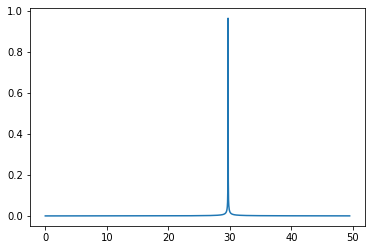

3.119692087173462


In [16]:
t1 = time.time()
yf = np.fft.fft(y)
xf = np.linspace(0.0, 1.0//(2.0*T), N//2)
fig, ax = plt.subplots()

# ax.plot(xf, 2.0/N * np.abs(yf[:N//2]))
print("xf ",xf.shape,N,yf.shape)

ax.plot(xf[:1250], 2.0/N * np.abs(yf[:N//4]))

plt.show()
total = t1-t0


print(total)

In [ ]:
# y1 = np.sin(50.0 * 2.0*np.pi*x[0:N//3])
# y2 =np.sin(70.0 * 2.0*np.pi*x[N//3:N])
# y= np.concatenate((y1, y2))
# print(y1.shape,"<<<<<",y2.shape,"<<<<<<<<<<<<",y.shape)
# y = np.random.rand(6000)*0.5
# y = np.ones(6000) *7
# y = np.random.normal(0,0.1,6000)
# y = np.ones(6000)
# yf = scipy.fftpack.fft(y)
# yf = np.fft.fft(y)
# yf = np.fft.ifft(y1)
# print(yf.shape)
# xf = np.linspace(0.0, 1.0//(2.0*T), N//2)
# print(xf.shape)
# print("size of x",sys.getsizeof(y),y.shape)
# fig, ax = plt.subplots()
# ax.plot(xf, 2.0/N * np.abs(yf[:N//2]))
# plt.show()